<a href="https://colab.research.google.com/github/luongduong147/Predict-the-crypto-price-with-LSTM/blob/main/AAVE_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Using RNN-LSTM to forecast some crypto price Data: https://www.kaggle.com/tusharsarkar/cryptodatapart1

In [ ]:
#import the data from the kaggle
import matplotlib.pyplot as plt
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"deetheemcee","key":"280a2f3789bf2e93147c920132d31454"}'}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!mkdir~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle dataset list
!kaggle datasets download -d tusharsarkar/cryptodatapart1
!unzip cryptodatapart1.zip


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/bin/bash: mkdir~/.kaggle: No such file or directory
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: argument command: invalid choice: 'dataset' (choose from 'competitions', 'c', 'datasets', 'd', 'kernels', 'k', 'config')
  0% 0.00/193k [00:00<?, ?B/s]
100% 193k/193k [00:00<00:00, 29.0MB/s]
Archive:  cryptodatapart1.zip
  inflating: AAVE.csv                
  inflating: ADA.csv                 
  inflating: ADX.csv                 
  inflating: AION.csv                
  inflating: ALGO.csv                
  inflating: ANT.csv                 
  inflating: ARDR.csv                
  inflating: ATM.csv                 
  inflating: ATOM.csv                
  inflating: AVAX.csv                


           Date         Open        High          Low        Close      Volume
0    2021-11-18  21120.39720  21417.4492  20251.52010  20466.88280   56176.831
1    2021-11-17  20652.54030  21380.3177  19865.35250  21127.82350  130514.085
2    2021-11-16  22405.14710  22412.5734  19583.15310  20659.96660  226930.156
3    2021-11-15  23415.12390  23563.6499  22212.06330  22405.14710  119735.534
4    2021-11-14  23214.61380  23585.9288  22991.82480  23400.27130   84935.864
..          ...          ...         ...          ...          ...         ...
791  2020-10-19   3034.55880   3047.9400   2669.69808   2674.75320   86475.936
792  2020-10-18   3074.62806   3079.5345   2931.07752   3029.35500   30917.953
793  2020-10-17   2926.84014   3214.0899   2840.23404   3075.07410   41971.143
794  2020-10-16   3197.88378   3256.0920   2906.09928   2933.53074   90836.412
795  2020-10-15   3823.30620   4386.0600   3177.81198   3196.54566   98648.870

[796 rows x 6 columns]


,Date,Open,High,Low,Close,Volume
0,2020-10-15,3821.326145,4383.788500,3176.166221,3194.890199,98648.870
1,2020-10-16,3196.227626,3254.405700,2904.594238,2932.011492,90836.412
2,2020-10-17,2925.324356,3212.425352,2838.763109,3073.481547,41971.143
3,2020-10-18,3073.035738,3077.939638,2929.559542,3027.786125,30917.953
4,2020-10-19,3032.987230,3046.361500,2668.315468,2673.367970,86475.936
...,...,...,...,...,...,...
396,2021-11-15,23415.123900,23563.649900,22212.063300,22405.147100,119735.534
397,2021-11-16,22405.147100,22412.573400,19583.153100,20659.966600,226930.156
398,2021-11-17,20652.540300,21380.317700,19865.352500,21127.823500,130514.085
399,2021-11-18,21120.397200,21417.449200,20251.520100,20466.882800,56176.831


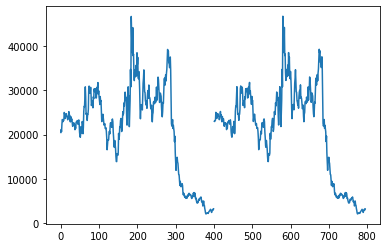

In [ ]:
from pandas.core import frame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("/content/AAVE.csv")
print(df)
#Checking NaN Values
df.isna().sum()
#Fill NaN Values
df.fillna(0)
#Plot the historical price
plt.plot(df["Close"])

grouped_data = df.groupby('Date', as_index = False).mean()
grouped_data

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf

#train_test_split
train_df = int(len(grouped_data) * 0.8)
test_df = len(grouped_data) - train_df
df_train = grouped_data.iloc[0:train_df, :]
df_test = grouped_data.iloc[train_df:len(grouped_data), :]
print("Train size: {}, Test size: {}". format(len(df_train), len(df_test)))


Train size: 320, Test size: 81


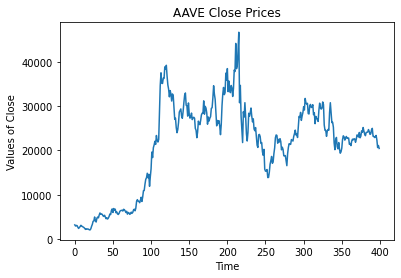

In [ ]:
#Visualizing
data_plot = grouped_data.loc[:, ["Close"]].values
plt.plot(data_plot)
plt.xlabel("Time")
plt.ylabel("Values of Close")
plt.title("AAVE Close Prices")
plt.show()


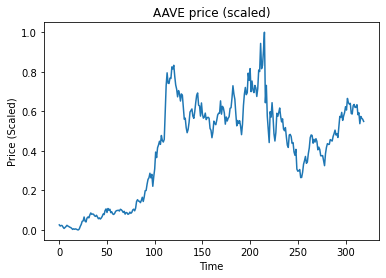

In [ ]:
#Reshape the data
data = df_train.loc[:, ["Close"]].values
data.shape
#reshape
data = data.reshape(-1, 1)

#change type
data = data.astype("float32")
data.shape
#MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaler.fit_transform(data)
data_scaled
#plot scaled data
plt.plot(data_scaled)
plt.xlabel("Time")
plt.ylabel("Price (Scaled)")
plt.title("AAVE price (scaled)")
plt.show()

LSTM modeling

In [ ]:
from keras.engine import sequential
#Spliting the Train data scaled
train=int(len(data_scaled))*0.8
val=len(data_scaled)-train
data_scaled_train=data_scaled[0:int(train), :]
data_scaled_val=data_scaled[int(train):len(data_scaled), :]

#Creating X,Y set with time_step and 1 output 
#train:
time_step = 20
dataX = []
dataY = []
for i in range(len(data_scaled_train) - time_step - 1):
    a = data_scaled_train[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_train[i + time_step, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)
#validation
time_step = 20
dataX = []
dataY = []
for i in range(len(data_scaled_val) - time_step - 1):
    a = data_scaled_val[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(data_scaled_val[i + time_step, 0])
valX = np.array(dataX)
valY = np.array(dataY)
#reshape to 3D tensor
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))



In [ ]:
#LSTM modeling
model = Sequential()
model.add(LSTM(256, input_shape = (1, time_step)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss= "mean_squared_error", optimizer = "adam")
model.fit(trainX, trainY, epochs=100, batch_size=50)
model.summary()

Epoch 1/100
5/5 [==============================] - 2s 6ms/step - loss: 0.1054
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0195
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0318
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0191
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0139
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0155
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0134
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0109
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0109
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0103
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0096
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 13/100
5/5 [==============================] - 0s 6ms/st

Prediction

In [ ]:
import math
trainPredict = model.predict(trainX)
valPredict = model.predict(valX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY_ = scaler.inverse_transform([trainY])
valPredict = scaler.inverse_transform(valPredict)
valY_ = scaler.inverse_transform([valY])

# calculate root mean squared error
trainscore = math.sqrt(mean_squared_error(trainY_[0], trainPredict[:, 0]))
print("Train Score: %.2f RMSE" % (trainscore))
valscore = math.sqrt(mean_squared_error(valY_[0], valPredict[:, 0]))
print("Val Score: %.2f RMSE" % (valscore))

Train Score: 2256.15 RMSE
Val Score: 1469.52 RMSE


No handles with labels found to put in legend.


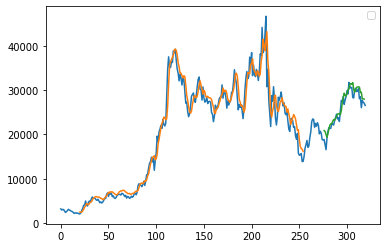

In [ ]:
#Visualize
# shifting train
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_step:len(trainPredict) + time_step, :] = trainPredict
# shifting validation predictions for plotting
valPredictPlot = np.empty_like(data_scaled)
valPredictPlot[:, :] = np.nan
valPredictPlot[len(trainPredict) + (time_step * 2) + 1:len(data_scaled) - 1, :] = valPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_scaled))
plt.plot(trainPredictPlot)
plt.plot(valPredictPlot)
#plt.xlim(2500,3200)
plt.legend()
plt.show()

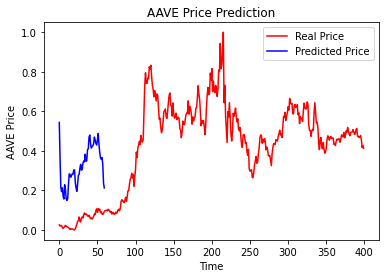

In [ ]:
#predict on real data

#Reshape the test
test = df_test.loc[:, ["Close"]].values
test.shape
#reshape
test = test.reshape(-1, 1)

#change type
test = test.astype("float32")
test.shape
#MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
test_scaled = scaler.fit_transform(test)
#Creating X,Y set with time_step and 1 output 
time_step = 20
dataX = []
dataY = []
for i in range(len(test_scaled) - time_step - 1):
    a = test_scaled[i:(i + time_step), 0]
    dataX.append(a)
    dataY.append(test_scaled[i + time_step, 0])
testX = np.array(dataX)
testY = np.array(dataY)
#reshape
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
#predict
testPredict=model.predict(testX)

scaler = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = scaler.fit_transform(data_plot)


plt.plot(dataset_scaled, color = 'red', label = 'Real Price')
plt.plot(testPredict, color = 'blue', label = 'Predicted Price')
plt.title('AAVE Price Prediction')
plt.xlabel('Time')
plt.ylabel('AAVE Price')
plt.legend()
plt.show()